# Python Programming: Naive Bayes classifier 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Develop a model that classifies the messas as spam or not.

### b) Defining the Metric for Success

The metric of success will be determined by the following metrics

- Accuracy Score 
- Precision Score 
- Recall Score 
- F1 Score 

### c) Recording the Experimental Design

- Defining the question
- Importing the library
- Loading the data
- Previewing the data
- Feature engineering
- EDA
- Naive Bayes
- Conclussion


## 2. Reading the Data

###Importing the libraries


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [16]:
# Loading the Data from the source 

# ---
# Dataset source = Dataset source = https://archive.ics.uci.edu/ml/datasets/Spambase
# ---
#
df = pd.read_csv('/content/spambase.data')
# test= pd.read_csv('/content/test_features.csv')



## 3. Checking the Data

In [17]:
# Determining the no. of records in our dataset
#
rows,columns = df.shape
print(f'There are {rows} rows, and {columns} columns')

There are 4600 rows, and 58 columns


In [18]:
# Previewing the top of our dataset
#
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [19]:
# Previewing the bottom of our dataset
# 
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [20]:
#Renaming all the columns for better analysis
df.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!',
       'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'spam']

In [21]:
df.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [22]:
# Checking whether each column has an appropriate datatype
#
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

**All the columns has appropriate datatype**

In [23]:
df['spam'].unique()

array([1, 0])

In [24]:
#Data description
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,...,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,...,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,...,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.275500,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.382500,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.314250,0.052000,0.000000,3.705250,43.000000,265.250000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


### a.Validation

## 5. Tidying the Dataset

Text(0, 0.5, 'word_freq_internet')

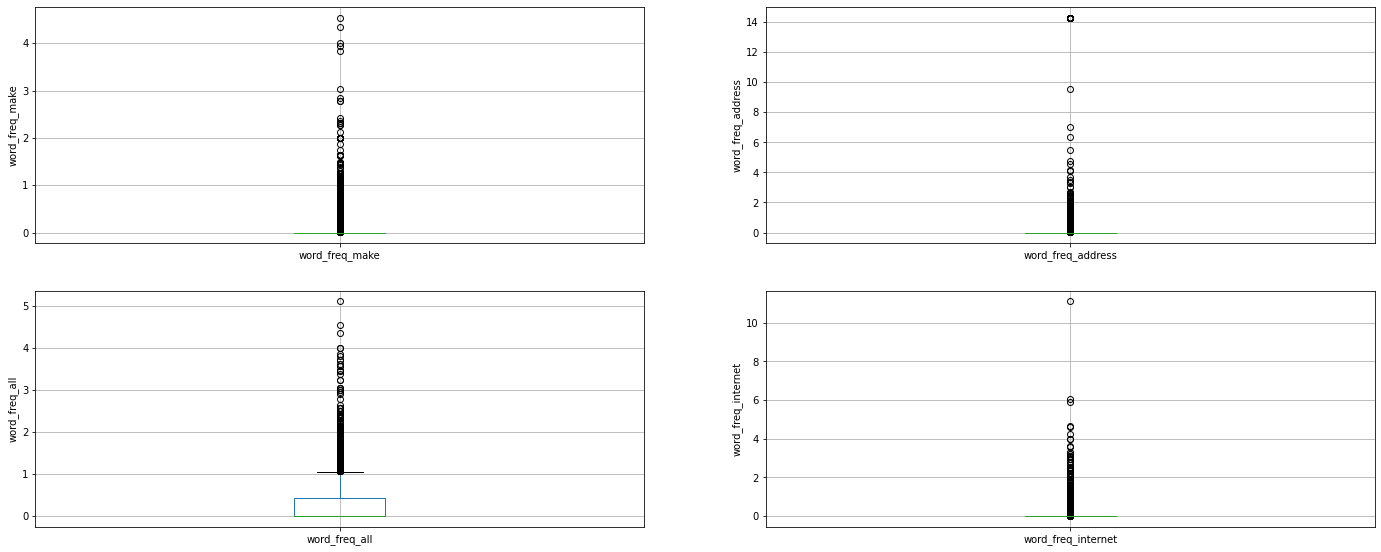

In [25]:
#Drawing boxplots to visualize outliers
plt.figure(figsize=(24,20))

plt.subplot(4,2,1)
fig=df.boxplot(column='word_freq_make')
fig.set_title('')
fig.set_ylabel('word_freq_make')

plt.subplot(4,2,2)
fig=df.boxplot(column='word_freq_address')
fig.set_title('')
fig.set_ylabel('word_freq_address')

plt.subplot(4,2,3)
fig=df.boxplot(column='word_freq_all')
fig.set_title('')
fig.set_ylabel('word_freq_all')

plt.subplot(4,2,4)
fig=df.boxplot(column='word_freq_internet')
fig.set_title('')
fig.set_ylabel('word_freq_internet')



In [26]:
# Checking for Anomalies
#
print("Anomalirs are outliers")

Anomalirs are outliers


In [27]:
# Identifying the Missing Data
#
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [28]:
# Dealing with the Missing Data
print("The dataset does not have null values.")

The dataset does not have null values.


In [29]:
# More data cleaning procedures
#checking for duplicates
df.duplicated().sum()

391

In [30]:
#removing duplicates
df=df.drop_duplicates()

## 6. Exploratory Analysis

###Univariate analysis

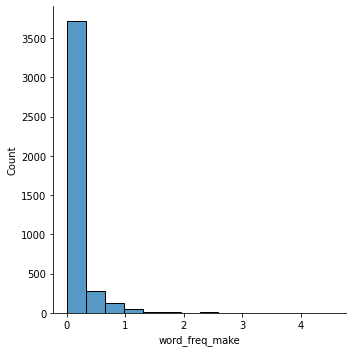

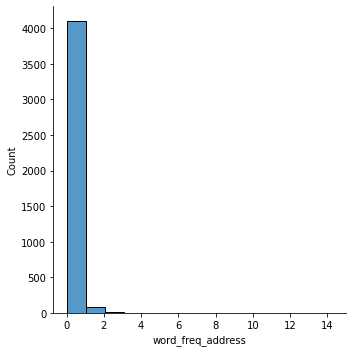

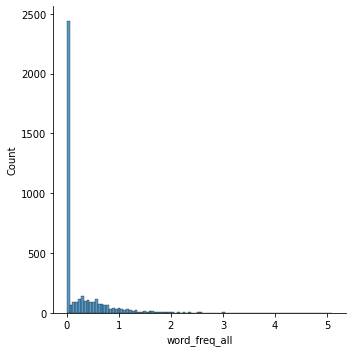

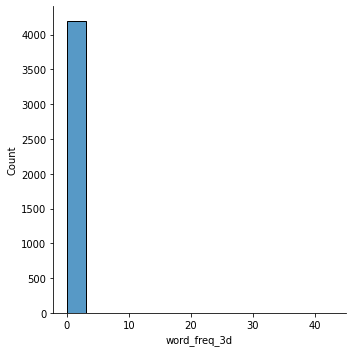

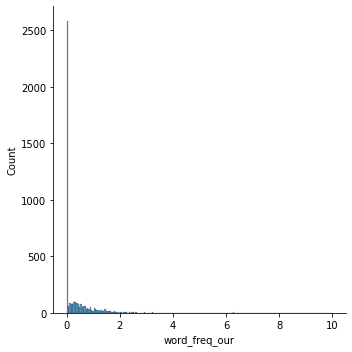

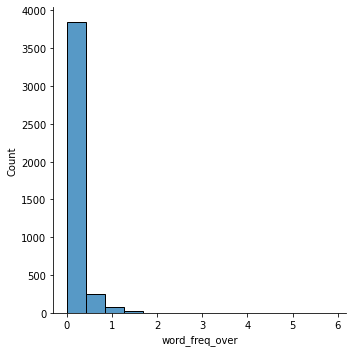

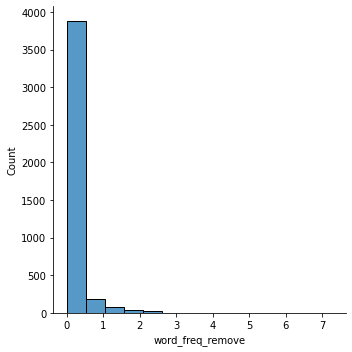

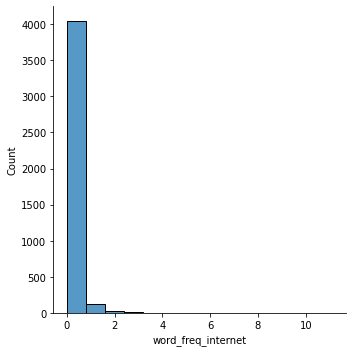

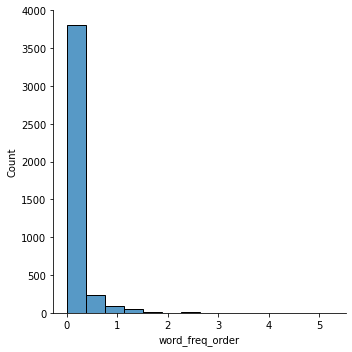

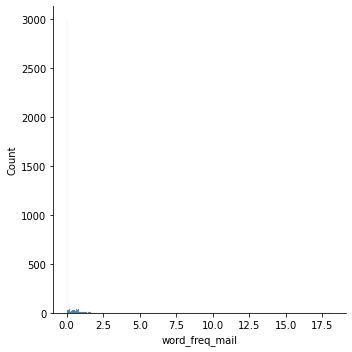

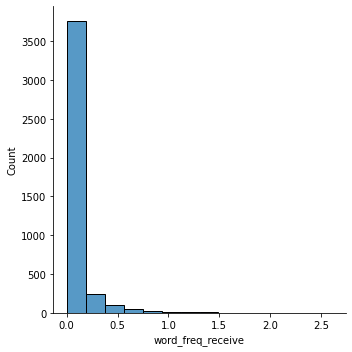

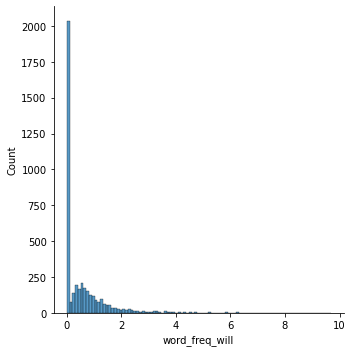

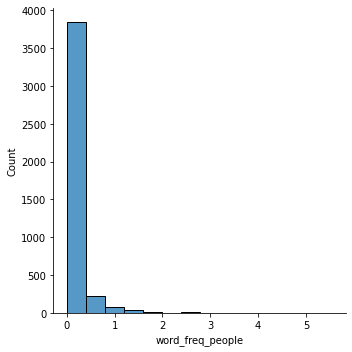

In [31]:
#Checking for normality distributin
continous_features = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people']
for features in continous_features:
  sns.displot(df[features])
  plt.show()

The features are left skewed.

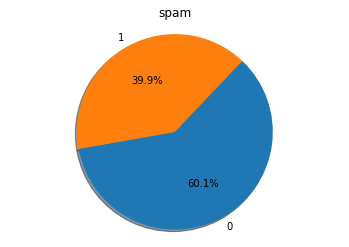

In [32]:
#Spam pie chart representation
spam_pie = df['spam'].value_counts()

#plotting pie chart
plt.pie(spam_pie,labels = spam_pie.index,autopct = '%1.1f%%',shadow=True,startangle=190)

#specify axis type
plt.axis('equal')

#setting the title
plt.title('spam')

#Displaying the plot
plt.show()

From the dataset, 60.1%  of the mwssenges are not spam while 39.1% are spam

###Bivariate Analysis

In [175]:
# Data Reduction
#Dealing with multicollineality
#checking for correlation
df.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
word_freq_remove,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
word_freq_internet,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
word_freq_order,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
word_freq_mail,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


In [177]:
#Dropping high correlated features
#Creating correlation matrix
corr_matrix = df.corr().abs()

#Selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#finding index of feature columns with corrrelation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column]>0.95)]

#Dropping the features
df.drop(df[to_drop],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


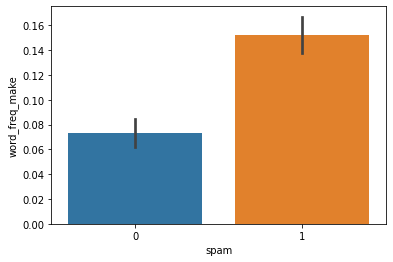

In [178]:
#Ploting bar plort
sns.barplot(x='spam', y='word_freq_make', data=df);

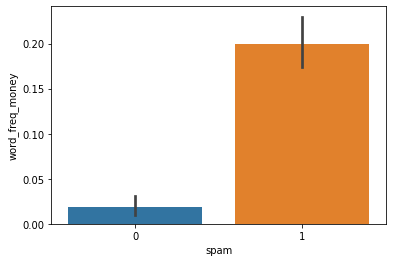

In [179]:
#Ploting bar plort
sns.barplot(x='spam', y='word_freq_money', data=df);

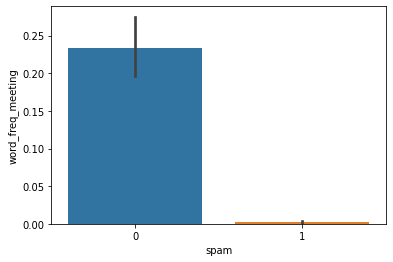

In [180]:
#Ploting bar plort
sns.barplot(x='spam', y='word_freq_meeting', data=df);

In [181]:
#checking for correlation
corr = df.corr()
corr

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
word_freq_remove,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
word_freq_internet,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
word_freq_order,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
word_freq_mail,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


## 7. Implementing the Solution

In [182]:
#defining dependent and independent variables

# defining independent variables
X=df.drop(columns=['spam'], axis=1)

#Defining the dependent variable
y=df['spam']

**Spliting the data into  80 - 20 set**

In [183]:
#Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

# #scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
#defining and training the model
model = GaussianNB()

#training the model
model.fit(X_train,y_train)

GaussianNB()

In [185]:
#Doing the prediction for both test and train data

#Prediction for train
y_pred_train = model.predict(X_train)

#prediction for test
y_pred_test = model.predict(X_test)

#Accuracy score
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train, y_pred_train)
testing_accuracy = accuracy_score(y_test, y_pred_test)

#printing the accuracy
print('Training Accuracy : ', training_accuracy)
print('Testing Accuracy : ', testing_accuracy)

Training Accuracy :  0.8197208197208197
Testing Accuracy :  0.8206650831353919


In [186]:
#Plotting confusiion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_test))
print("***************************************")
print(classification_report(y_test,y_pred_test))
print("*******************************************************")
print("*******************************************************")
print('Accuracy Score :',accuracy_score(y_test,y_pred_test))
print('Precision Score :',precision_score(y_test,y_pred_test))
print('Recall Score :',recall_score(y_test,y_pred_test))
print('F1 Score :',f1_score(y_test,y_pred_test))

[[383 134]
 [ 17 308]]
***************************************
              precision    recall  f1-score   support

           0       0.96      0.74      0.84       517
           1       0.70      0.95      0.80       325

    accuracy                           0.82       842
   macro avg       0.83      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842

*******************************************************
*******************************************************
Accuracy Score : 0.8206650831353919
Precision Score : 0.6968325791855203
Recall Score : 0.9476923076923077
F1 Score : 0.803129074315515


**Spliting the data into  70 - 30 set**

In [187]:
#Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

# #scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#defining and training the model
model = GaussianNB()

#training the model
model.fit(X_train,y_train)

GaussianNB()

In [188]:
#Doing the prediction for both test and train data

#Prediction for train
y_pred_train = model.predict(X_train)

#prediction for test
y_pred_test = model.predict(X_test)

#Accuracy score
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train, y_pred_train)
testing_accuracy = accuracy_score(y_test, y_pred_test)

#printing the accuracy
print('Training Accuracy : ', training_accuracy)
print('Testing Accuracy : ', testing_accuracy)

Training Accuracy :  0.814663951120163
Testing Accuracy :  0.8012668250197942


In [189]:
#Plotting confusiion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred_test))
print("***************************************")
print(classification_report(y_test,y_pred_test))

print("*******************************************************")
print("*******************************************************")
print('Accuracy Score :',accuracy_score(y_test,y_pred_test))
print('Precision Score :',precision_score(y_test,y_pred_test))
print('Recall Score :',recall_score(y_test,y_pred_test))
print('F1 Score :',f1_score(y_test,y_pred_test))

[[541 228]
 [ 23 471]]
***************************************
              precision    recall  f1-score   support

           0       0.96      0.70      0.81       769
           1       0.67      0.95      0.79       494

    accuracy                           0.80      1263
   macro avg       0.82      0.83      0.80      1263
weighted avg       0.85      0.80      0.80      1263

*******************************************************
*******************************************************
Accuracy Score : 0.8012668250197942
Precision Score : 0.6738197424892703
Recall Score : 0.9534412955465587
F1 Score : 0.7896060352053645


**Spliting the data into  60 - 40 set**

In [190]:
#Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40)

# #scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#defining and training the model
model = GaussianNB()

#training the model
model.fit(X_train,y_train)

GaussianNB()

In [191]:
#Doing the prediction for both test and train data

#Prediction for train
y_pred_train = model.predict(X_train)

#prediction for test
y_pred_test = model.predict(X_test)

#Accuracy score
from sklearn.metrics import accuracy_score
training_accuracy = accuracy_score(y_train, y_pred_train)
testing_accuracy = accuracy_score(y_test, y_pred_test)

#printing the accuracy
print('Training Accuracy : ', training_accuracy)
print('Testing Accuracy : ', testing_accuracy)

Training Accuracy :  0.8289108910891089
Testing Accuracy :  0.8206650831353919


In [192]:
#Plotting confusiion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
print(cm)
print("***************************************")
print(classification_report(y_test,y_pred_test))

print("*******************************************************")
print("*******************************************************")
print('Accuracy Score :',accuracy_score(y_test,y_pred_test))
print('Precision Score :',precision_score(y_test,y_pred_test))
print('Recall Score :',recall_score(y_test,y_pred_test))
print('F1 Score :',f1_score(y_test,y_pred_test))

[[759 267]
 [ 35 623]]
***************************************
              precision    recall  f1-score   support

           0       0.96      0.74      0.83      1026
           1       0.70      0.95      0.80       658

    accuracy                           0.82      1684
   macro avg       0.83      0.84      0.82      1684
weighted avg       0.86      0.82      0.82      1684

*******************************************************
*******************************************************
Accuracy Score : 0.8206650831353919
Precision Score : 0.7
Recall Score : 0.9468085106382979
F1 Score : 0.804909560723514


###Conclusion

When the data is split into **80-20 set**, the following are the outcomes:

- Accuracy Score : 0.8206650831353919
- Precision Score : 0.6968325791855203
- Recall Score : 0.9476923076923077
- F1 Score : 0.803129074315515

When the data is split into **70-30 set**, the following are the outcomes:

- Accuracy Score : 0.8012668250197942
- Precision Score : 0.6738197424892703
- Recall Score : 0.9534412955465587
- F1 Score : 0.7896060352053645

When the data is split into **60-40 set**, the following are the outcomes:

- Accuracy Score : 0.8206650831353919
- Precision Score : 0.7
- Recall Score : 0.9468085106382979
- F1 Score : 0.804909560723514

**When the training data is reduced, the testing accuracy score and the precision score increases to a certain point and then it starts to decrease.**

In order to solve this probem, more training data is required in order to reduce the chances of overfitting and underfitting.

## 8. Challenging the solution

In [193]:
#defining dependent and independent variables

# defining independent variables
X=df.drop(columns=['spam'], axis=1)

#Defining the dependent variable
y=df['spam']

In [194]:
#Challenging the solution using KNN
#Testing and Training
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#KNN classifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# #scaling the data
scaler = StandardScaler()
scaler.fit(X_train)

#Making the prediction
y_pred = classifier.predict(X_test)

In [195]:
print(confusion_matrix(y_test,y_pred))
print("***************************************")
print(classification_report(y_test,y_pred))


[[431  81]
 [ 90 240]]
***************************************
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       512
           1       0.75      0.73      0.74       330

    accuracy                           0.80       842
   macro avg       0.79      0.78      0.79       842
weighted avg       0.80      0.80      0.80       842



**Naive Bayes has better accuracy comoared to KNN hense it will remainn to be the best model**

## 9. Follow up questions

### a). Did we have the right data?

Yes, the data was right



### b). Do we need other data to answer our question?

more data was required to determine the accuracy of the model.

### c). Did we have the right question?

the question was right and precise.